In [85]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

#all models tested
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [86]:
stu_math = pd.read_csv('student-mat.csv')

#replace known classes to numeric form for classification
stu_math = stu_math.replace(['yes','no','M','F','U','R','LE3','GT3','T','A','GP','MS'],[1,0,1,0,1,0,1,0,1,0,1,0])

#replace other classes to numeric form
a5 = stu_math.Mjob.unique()
Mjob  = dict(zip(a5, range(len(a5))))  
stu_math.Mjob  = [Mjob[item] for item in stu_math.Mjob ]

a6 = stu_math.Fjob.unique()
Fjob  = dict(zip(a6, range(len(a6))))  
stu_math.Fjob  = [Fjob[item] for item in stu_math.Fjob ]

a7 = stu_math.reason.unique()
reason  = dict(zip(a7, range(len(a7))))  
stu_math.reason  = [reason[item] for item in stu_math.reason ]

a8 = stu_math.guardian.unique()
guardian  = dict(zip(a8, range(len(a8))))  
stu_math.guardian  = [guardian[item] for item in stu_math.guardian ]

X_math = stu_math.drop(['G1','G2','G3'], axis=1)
Y_math_G3 = stu_math['G3']

#scale feature set as some algorithms need scaled data to perform well
x = X_math.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
Y = Y_math_G3

In [96]:
#functions to get metrics for the models

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=3, average='macro'), 
            recall_score(y, yPred, pos_label=3, average='macro'))

def recall_func(estimator, x, y):
    a, p, r = getScores(estimator, x, y)
    return r

def pres_func(estimator, x, y):
    a, p, r = getScores(estimator, x, y)
    return p

def f1_score_func(estimator, x, y):
    a, p, r = getScores(estimator, x, y)
    if(p==0 or r==0):
        return 0
    return (2*p*r)/(p+r)

def acc_func(estimator, x, y):
    a, p, r = getScores(estimator, x, y)
    return a


In [98]:
seed = 1

#list of all models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))

f1_scores = []
accuracy = []
recall = []
precision = []
names = []

#get scores on different metrics for all the models in list
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    f1_score = model_selection.cross_val_score(model, X, Y, cv=kfold,scoring=f1_score_func)
    acc = model_selection.cross_val_score(model, X, Y, cv=kfold,scoring=acc_func)
    pre = model_selection.cross_val_score(model, X, Y, cv=kfold,scoring=pres_func)
    rec = model_selection.cross_val_score(model, X, Y, cv=kfold,scoring=recall_func)
    accuracy.append(acc)
    f1_scores.append(f1_score)
    recall.append(rec)
    precision.append(pre)
    names.append(name)
    #print mean metric for the model
    print(name,"\nAccuracy: ",acc.mean(),"\nRecall: ", rec.mean(),"\nPrecission: ",pre.mean(),"\nF1 score: ",f1_score.mean(),"\n\n")

LogisticRegression 
Accuracy:  0.0983974358974 
Recall:  0.0731670775805 
Precission:  0.049399510212 
F1 score:  0.0554771006836 


LinearDiscriminantAnalysis 
Accuracy:  0.111153846154 
Recall:  0.0843929648783 
Precission:  0.067400159481 
F1 score:  0.0695211903227 


KNeighborsClassifier 
Accuracy:  0.10891025641 
Recall:  0.075319884364 
Precission:  0.0875090073908 
F1 score:  0.078271530102 


DecisionTreeClassifier 
Accuracy:  0.154487179487 
Recall:  0.103140251613 
Precission:  0.0978567176871 
F1 score:  0.115632089996 


DecisionTreeRegressor 
Accuracy:  0.126794871795 
Recall:  0.0947876939237 
Precission:  0.0931215569561 
F1 score:  0.100163835094 


GaussianNB 
Accuracy:  0.0680128205128 
Recall:  0.0612568681319 
Precission:  0.0333261267718 
F1 score:  0.0333000901585 


SVC 
Accuracy:  0.136794871795 
Recall:  0.0851226551227 
Precission:  0.0197048458239 
F1 score:  0.0294163403688 




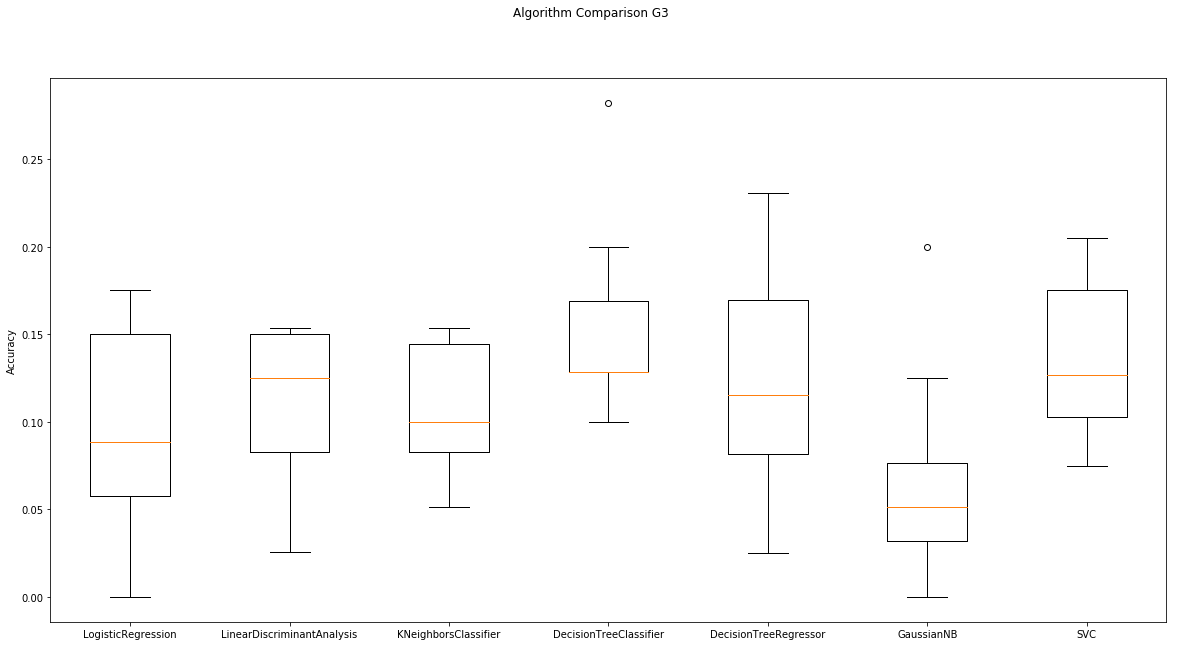

In [99]:
#plot box plot for all models on Accuracy
fig = plt.figure(1,[20,10])
fig.suptitle('Algorithm Comparison G3')
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(names)
ax.set_ylabel("Accuracy")
plt.show()

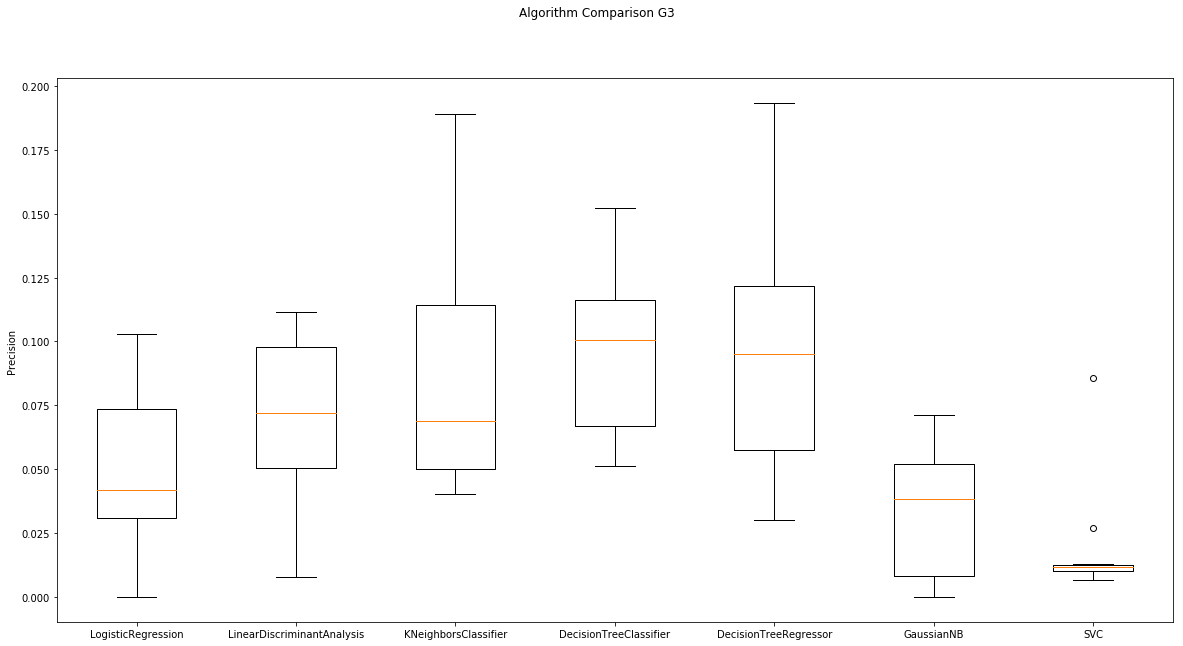

In [100]:
#plot box plot for all models on Precision
fig = plt.figure(1,[20,10])
fig.suptitle('Algorithm Comparison G3')
ax = fig.add_subplot(111)
plt.boxplot(precision)
ax.set_xticklabels(names)
ax.set_ylabel("Precision")
plt.show()

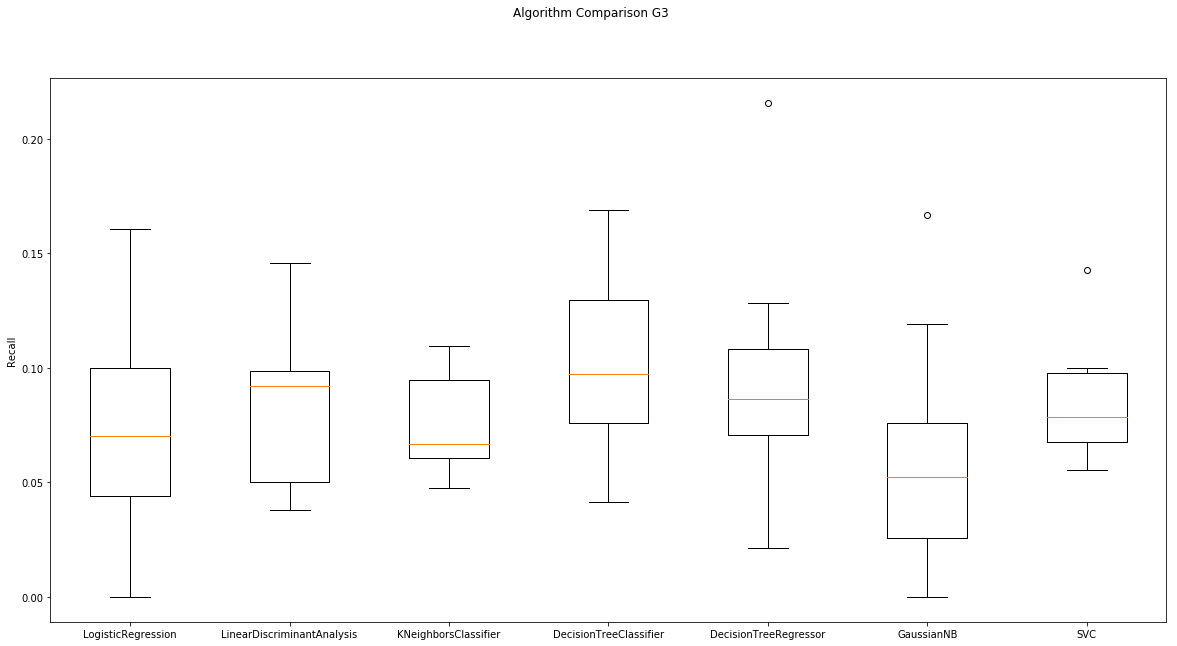

In [101]:
#plot box plot for all models on Recall
fig = plt.figure(1,[20,10])
fig.suptitle('Algorithm Comparison G3')
ax = fig.add_subplot(111)
plt.boxplot(recall)
ax.set_xticklabels(names)
ax.set_ylabel("Recall")
plt.show()

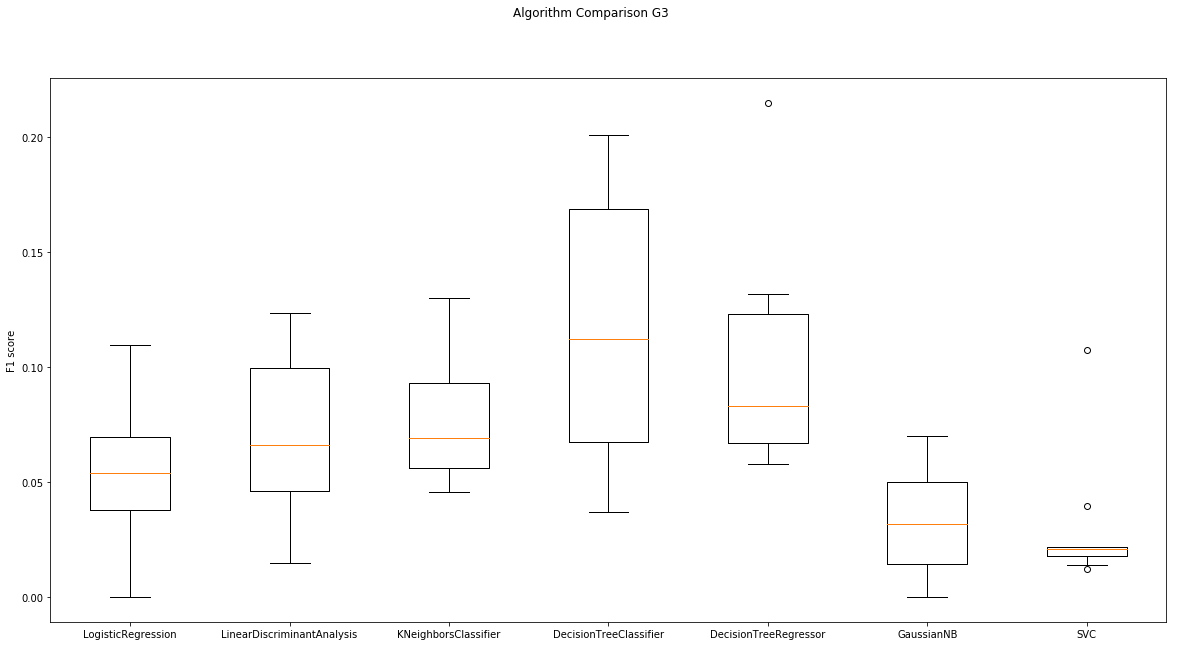

In [102]:
#plot box plot for all models on F1 scores
fig = plt.figure(1,[20,10])
fig.suptitle('Algorithm Comparison G3')
ax = fig.add_subplot(111)
plt.boxplot(f1_scores)
ax.set_xticklabels(names)
ax.set_ylabel("F1 score")
plt.show()

The notebook shows comparative study of different machine learning models on Math course dataset. Similar analysis can be extended to the Portuguese language course.

We don't include G1 and G2 attributes in prediction of G3 as it won't be fair to use them. Final grade will obviously be related to first and second period grade. Taking them into account the accuracy and F1 score increases.

Since the feauture set contains discrete attributes therefore classification algorithm are the ones chosen for the comparison. Although the grade is a continous attribute, it is taken as discrete, i.e. 20 classes from 1 to 20, due to the classification model used. This makes the baseline accuracy very low.

The catogorical data is replaced with numeric values to feed them into machine learning models. The models with default parameters are chosen for better comparison.

The metrics we are testing our models on are : Accuracy, Precision, Recall and F1-score; F1-score being the most useful.

Overall performance of the models in not very good although they improve upon the baseline accuracy. This is because Grade is a continuous attribute and should be predicted by a regression model but the features don't have continuous data and therefore won't work with regression models.

Decision Trees perform better than other algorithms. This is because lot of these attributes were either Yes/No questions or attributes with few classes and Decision trees perform well with these kind of data. The amount of data is less which favours Decision trees as other algorithms require lot of data.